<a href="https://colab.research.google.com/github/DiegoAristizabal15/Python-DataScientist/blob/main/Regresi%C3%B3n_lineal-DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión lineal**







En este notebook de vamos a ver cómo modelar datos mediante regresion lineal (multivariada), interpretando los resultados y discutiendo las limitaciones.

Vamos a introducir por primera vez en la materia a la libreria de Python scikit-learn (https://scikit-learn.org/)

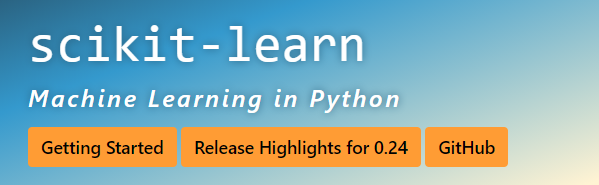


Scikit-learn no solamente es útil, sino que su documentación es excelente. Les recomendamos entrar a la página web y explorarla. Creemos que es posible aprender un montón de machine learning únicamente mirando la documentación de scikit-learn.

Vamos a inventarnos un dataset para trabajar en este notebook. El dataset va a constar de una variable dependiente (cantidad de unidades vendidas) y las siguientes dos variables independientes: precio por unidad y gasto publicitario.

El dataset va a ser "sintético", creado por nosotros mismos. Primero inventamos valores para el precio por unidad y la inversión publicitaria:

<p><a name="contents"></a></p>

# Contenido Sesión: Regresión lineal


- <a href="#Ejemplo1">1. Ejemplo 1</a><br>
- <a href="#Ejemplo2">2. Ejemplo 2</a><br> 
- <a href="#Ejemplo3">2. Ejemplo 3 </a><br>
  - <a href="#RegLinSimp">2.1 Regresión lineal simple</a><br>
  - <a href="#RegLinMul">3.2. Regresión lineal multiple</code></a><br>
  - <a href="#OtrEstLim">3.3 Otros estimadores lineales</code></a><br>
  - <a href="#RegRid">3.3.1. Regresión Ridge</code></a><br>
  - <a href="#RegLas">3.3.2 Regresión Lasso</code></a><br>
- <a href="#Ejemplo2"> Ejemplo 4</code></a><br>
  - <a href="#Pregunta1">4.1. Pregunta 1</a><br>
  - <a href="#Pregunta2">4.2. Pregunta 2</a><br>
  - <a href="#Pregunta3">4.3. Pregunta 3</a><br>
  - <a href="#Pregunta4"> 4.4. Pregunta 4</a><br>
  - <a href="#Pregunta5">4.5. Pregunta 5</a><br>
  - <a href="#Pregunta6">4.5. Pregunta 6</a><br>
  - <a href="#Pregunta7">4.7. Pregunta 7</a><br>
  - <a href="#Pregunta8">4.8. Pregunta 8</a><br>

  



<p><a name="Ejemplo1"></a></p>

# 1. **Ejemplo 1**




In [ ]:
import numpy as np

precio = np.array([24, 30, 43 , 101, 34, 94, 10, 15, 12, 44, 202, 156, 90])
gasto = np.array([2000, 4801, 210, 10000, 6000, 503, 491, 4000, 9200, 1000, 1500, 1800, 3000])

precio.shape

(13,)

Ahora, vamos a construir la variable dependiente, "ventas". 

Primero, vamos a considerar un coeficiente negativo por "precio" sumado a un término de error:


In [ ]:
X = precio.reshape(-1, 1) # esto es necesario para transformar el vector en matriz

In [ ]:
X

array([[ 24],
       [ 30],
       [ 43],
       [101],
       [ 34],
       [ 94],
       [ 10],
       [ 15],
       [ 12],
       [ 44],
       [202],
       [156],
       [ 90]])

In [ ]:
print(X.shape)

(13, 1)


In [ ]:
beta, beta0 = -0.3, 100

mu, sigma = 0, 10   # medio y desvío estándar del error
epsilon = np.random.normal(mu, sigma, X.shape[0])

In [ ]:
epsilon

array([ -7.28738734, -14.0780761 ,   4.48658727,   0.82419265,
         2.23523219, -16.97616061,   1.05531421,   8.0908195 ,
       -21.87860649,  10.88059148,   6.74406165,  -4.47858555,
         7.97827874])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


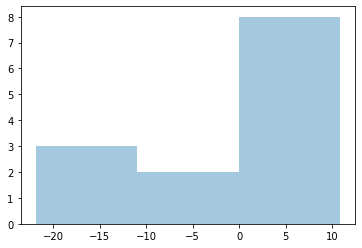

In [ ]:
# library & dataset
import seaborn as sns
# Plot the histogram thanks to the distplot function
sns.distplot( epsilon, hist=True, kde=False, rug=False )

In [ ]:
y = (np.dot(np.transpose(X),beta)+ beta0 + epsilon).round()

In [ ]:
y

array([[ 86.,  77.,  92.,  71.,  92.,  55.,  98., 104.,  75.,  98.,  46.,
         49.,  81.]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


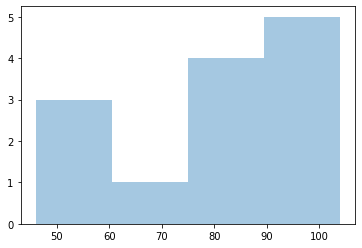

In [ ]:
# library & dataset
import seaborn as sns
# Plot the histogram thanks to the distplot function
sns.distplot( y, hist=True, kde=False, rug=False )

In [ ]:
y = np.transpose(y)

In [ ]:
y

array([[ 86.],
       [ 77.],
       [ 92.],
       [ 71.],
       [ 92.],
       [ 55.],
       [ 98.],
       [104.],
       [ 75.],
       [ 98.],
       [ 46.],
       [ 49.],
       [ 81.]])

In [ ]:
print(X)
print(y)

[[ 24]
 [ 30]
 [ 43]
 [101]
 [ 34]
 [ 94]
 [ 10]
 [ 15]
 [ 12]
 [ 44]
 [202]
 [156]
 [ 90]]
[[ 86.]
 [ 77.]
 [ 92.]
 [ 71.]
 [ 92.]
 [ 55.]
 [ 98.]
 [104.]
 [ 75.]
 [ 98.]
 [ 46.]
 [ 49.]
 [ 81.]]


Podemos hacer el plot de una variable contra la otra y ver que sugiere que existe una relación lineal entre ambas:

Text(0.5, 0, 'Precio por unidad')

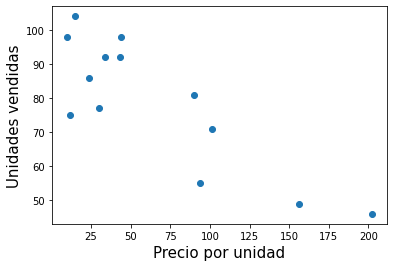

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.ylabel(r'Unidades vendidas', fontsize=15, color='black')
plt.xlabel(r'Precio por unidad', fontsize=15, color='black')

## Realizada Seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


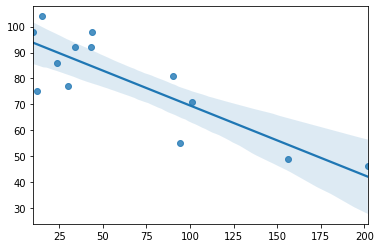

In [ ]:
# library & dataset
import seaborn as sns

# use the function regplot to make a scatterplot
sns.regplot(X ,y)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


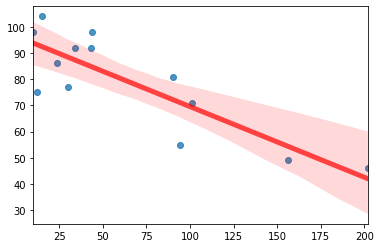

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

 
# plot
sns.regplot(X,y, line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

Vimos que el objetivo de la regresión lineal es encontrar parámetros beta0, beta1 tales que minimicen el error cuadrático medio. Esto lo vamos a hacer más adelante con scikit-learn. 

Antes, podemos ilustrar el problema a resolver de la siguiente manera. Definamos una función que encuentra el error cuadrático medio dados parámetros beta0, beta1.

In [ ]:
def error_cuadratico_medio(X,y,beta):
  error=0.0
  for n,val in enumerate(y):
    y_est = beta[0] + beta[1]*X[n]
    error = error + (y_est - y[n])**2
  return error/len(y)


Ahora puedo adivinar valores de beta y obtener el error asociado.

In [ ]:
print(error_cuadratico_medio(X,y,[60,0.4]))
print(error_cuadratico_medio(X,y,[60,-0.4]))
print(error_cuadratico_medio(X,y,[-60,0.4]))
print(error_cuadratico_medio(X,y,[100,-0.3])) # este es el valor real de los parametros

[1634.65230769]
[2185.66769231]
[14225.42153846]
[102.83615385]


Visualicemos la curva tridimensional que tengo que minimizar para encontrar los parametros: la curva del error cuadratico medio vs. beta0 y beta1.

Text(0.5, 0, 'beta1')

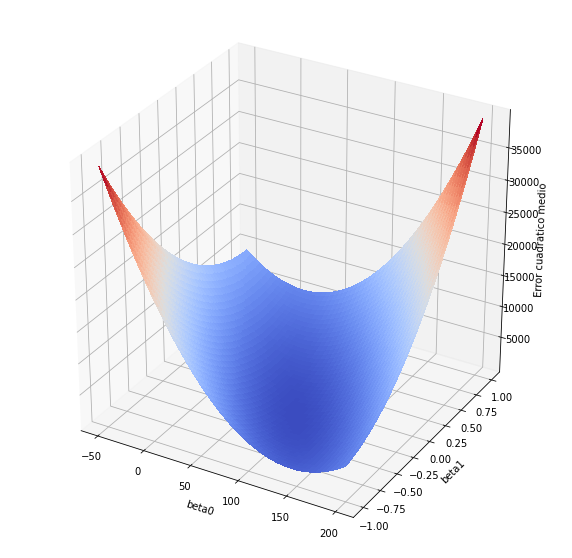

In [ ]:
beta0 = np.arange(-50,200,0.25)
beta = np.arange(-1,1,0.01)
X0, Y0 = np.meshgrid(beta0, beta)

Z = error_cuadratico_medio(X,y,[X0,Y0])

from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))
surf = ax.plot_surface(X0, Y0, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_zlabel('Error cuadratico medio')
ax.set_xlabel('beta0')
ax.set_ylabel('beta1')


Ahora ajustamos un modelo de regresión lineal a los datos usando sci-kit learn.

El proceso de ajustar modelos con scikit-learn es siempre el mismo:

1.   Creamos un objeto que representa el modelo, pasándole los parámetros correspondientes.
2.   Entrenamos el modelo con los datos.
3.   Usamos el modelo para predecir el valor de nuevos datos.



In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression() # Regresión lineal por mínimos cuadrados ordinarios.
reg.fit(X,y) # realiza un ajueste del  modelo lineal.

estimated = [reg.intercept_, reg.coef_]  # los parametros estimados de las intercepciones 
print(estimated)

R2 = reg.score(X,y) # Devuelve el coeficiente de determinación de R cuadrado  de la predicción.
print(R2)


[array([96.49553122]), array([[-0.2695227]])]
0.7109770710252455


Vamos a graficar la recta teórica junto con la que mejor ajusta los datos.

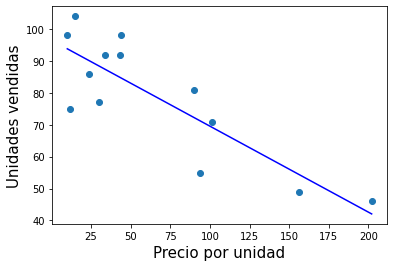

In [ ]:
plt.scatter(X,y)
plt.ylabel(r'Unidades vendidas', fontsize=15, color='black')
plt.xlabel(r'Precio por unidad', fontsize=15, color='black')

x_var = np.arange( X.min(), X.max(), 0.001)
y_var = estimated[0] + x_var*estimated[1]
y_var_est = 100 + x_var*(-0.3)

plt.plot(x_var,np.transpose(y_var),label="Estimated", color='b')

Podemos graficar fácilmente los intervalos de confianza de 95% usando seaborn.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Unidades vendidas')

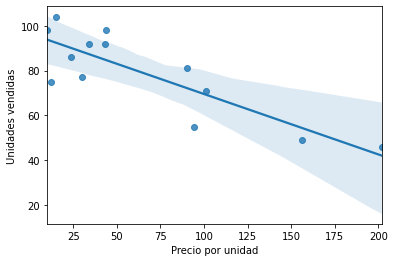

In [ ]:
import seaborn as sns
  
ax = sns.regplot(X, y, ci=99)
ax.set_xlabel('Precio por unidad')
ax.set_ylabel('Unidades vendidas')



Supongamos que agregamos más datos y conocemos el precio por unidad. ¿Cuál es la predicción sobre la cantidad de unidades vendidas?

Text(0.5, 0, 'Precio por unidad')

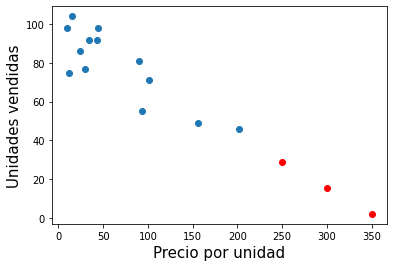

In [ ]:
precios_nuevo = np.array([250, 300, 350]) # Crea unos nuevos precios 
X_nuevo = precios_nuevo.reshape(-1, 1) # Genera el vector
 
y_nuevo = reg.predict(X_nuevo)  # hago la prediccion para estos nuevos valores

plt.scatter(X,y) # dibujo los nuevos valores
plt.scatter(X_nuevo,y_nuevo, color='r') # dibujo los nuevos valores del prediccion en rojo

plt.ylabel(r'Unidades vendidas', fontsize=15, color='black')
plt.xlabel(r'Precio por unidad', fontsize=15, color='black')


Veamos por último el caso de la regresión usando dos variables independientes: el precio por unidad y el gasto de publicidad.

Primero creo una matriz que contenga ambas variables y luego simulo los datos multiplicando cada fila por su coeficiente, y agregando ruido normalmente distribuido.

In [ ]:
X = np.column_stack((precio,gasto))  # variables independientes
beta = np.array([-0.3,0.1]) # parametros 
beta0 = 20  # 

mu, sigma = 0, 10   # medio y desvío estándar del error
epsilon = np.random.normal(mu, sigma, X.shape[0])

y = (np.dot(X,beta)+ beta0 + epsilon).round()

Ahora que ya simulé los datos, voy crear y estimar el modelo de regresión.

In [ ]:
reg = LinearRegression()
reg.fit(X,y)

estimated = [reg.intercept_, reg.coef_[0], reg.coef_[1]]

print(estimated)

R2 = reg.score(X,y) # R2
print(R2)


[17.432935492342096, -0.2771978033055061, 0.10114315156557152]
0.9992450461704917



<p><a name="Ejemplo2"></a></p>

# **2. Ejemplo 2**





Tomado de: https://aprendeia.com/algoritmo-regresion-lineal-simple-machine-learning-practica-con-python/

En la entrada de hoy veremos la parte práctica del algoritmo de Regresión Lineal Simple, en donde desarrollaremos un modelo para predecir el precio de las casas en Boston de acuerdo al número de habitaciones que cuenta la vivienda.

Para este análisis no nos vamos a complicar mucho y utilizaremos uno de los dataset disponible en la librería sckit-learn y es el correspondiente al de Boston Housing o las casas de Boston.

Si no lo sabías dentro de la librería sckit-learn se dispone de varios dataset, muy básicos, con los que puedes practicar tus conocimientos de Machine Learning, no son muchos, pero cubre los principales tipos de algoritmos como regresión y clasificación.

Como todos los programas que hemos desarrollados hasta ahora lo primero que debemos hacer es importar las librerías que vamos a utilizar.

En este caso vamos a importar numpy, y de sklearn importamos datasets, que es donde se guardan todos los conjuntos de datos que dispone esta librería y a su vez importamos de una vez linear_model ya que vamos a hacer el programa basándonos únicamente en Regresión Lineal.

A su vez importamos matplotlib ya que graficaremos los resultados obtenidos.

In [ ]:
#Se importan la librerias a utilizar
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

Seguidamente importamos los datos, para ello utilizamos la instrucción datasets punto load_boston().

In [ ]:
#Importamos los datos de la misma librería de scikit-learn
boston = datasets.load_boston()

Como tenemos mucha información dentro de esta variable lo que se nos hace difícil entender la información, por lo tanto, ahora procedemos a entender la data.

Para ello lo primero que vamos hacer es verificar la información contenida en el dataset, para este fin utilizamos la instrucción keys.

In [ ]:
#Verifico la información contenida en el dataset
print('Información en el dataset:')
print(boston.keys())

Información en el dataset:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Como podemos observar el dataset cuenta con la siguiente información: primeramente, la “data”, seguidamente “target” que sería la columna con las etiquetas o respuestas, posteriormente tenemos feature_names que serían los nombres de cada una de las columnas de la data y finalmente tenemos DESCR que sería la descripción total del dataset.

Sabiendo ya esto podemos ahora utilizar estos nombres para entender mejor los datos, lo primero que vamos a hacer es utilizar DESCR para ver las características del dataset.

In [ ]:
#Verifico las características del dataset
print('Características del dataset:')
print(boston.DESCR)

Características del dataset:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 

En la descripción de este dataset cuenta con 506 datos y 13 atributos, la columna 14 es el target y es la media del valor de las viviendas.

Seguidamente tenemos la descripción del significado de cada una de las columnas o atributos de los datos. De igual forma nos indica un dato importante para nuestro análisis y es que nos indican que no existe ningún valor perdido, en consecuencia, nuestra data esta completa por lo que no es necesario realizar mucho preprocesamiento a los datos.

Ahora utilizaremos la instrucción shape para determinar la cantidad de datos contamos, aunque este es un paso de más ya que esta información nos la había dado previamente la descripción del dataset, pero de todas formas lo hacemos.

In [ ]:
#Verifico la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
print(boston.data.shape)

Cantidad de datos:
(506, 13)


Como ya nos lo habían indicado este conjunto de datos cuenta con 506 muestras y 13 columnas.

Finalmente veamos las etiquetas de cada columna para ello utilizamos feature_names.

In [ ]:
#Verifico la información de las columnas
print('Nombres columnas:')
print(boston.feature_names)

Nombres columnas:
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Como podemos observar tenemos muchos datos, pero para nuestro análisis solamente vamos a tomar la columna correspondiente al número de habitaciones con las que cuenta la casa, esta sería la que lleva por nombre “RM”.

Sabiendo toda esta información entonces procedemos a preparar los datos que vamos a utilizar para crear el modelo.

Para este ejemplo vamos a implementar un predictor de Regresión Lineal Simple, si te acuerdas un poco de la teoría explicada en videos anteriores, para este algoritmo solamente se requiere una variable independiente, para nuestro caso será la correspondiente al número de habitaciones, pero también puedes tomar la columna correspondiente a los años de construcción de la vivienda o cualquier otra que consideres prudente, lo importante acá es que debes seleccionar solamente una de ellas.

Para nuestro caso las variables se encuentran ubicadas en la columna número 5, recuerda que el conteo de columnas y filas siempre comienza desde 0, esta columna sería los datos correspondientes a “X” en nuestro análisis.

Es importante detallar acá que los datos se encuentran almacenados como numpy por lo que tenemos que tratarlos como tal.

In [ ]:
#Seleccionamos solamente la columna 5 del dataset
X = boston.data[:, np.newaxis, 5]

Definido “X” ahora definimos “y” el cual será igual a los datos contenidos en target, como ya lo habíamos visto anteriormente.

In [ ]:
#Defino los datos correspondientes a las etiquetas
y = boston.target  

Grafiquemos los datos utilizando una gráfica de dispersión para ver exactamente la distribución de los datos.

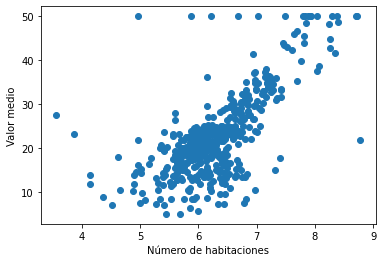

In [ ]:
#Graficamos los datos correspondientes
plt.scatter(X, y)
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

A simple vista ya puedo deducir que el modelo de Regresión Lineal que vamos a construir tendrá un error muy alto, pero esto lo explicaré más adelante, pero continuemos con nuestro análisis.

Como lo primero que debemos hacer es separar los datos en entrenamiento y prueba lo hacemos utilizando la instrucción train_test_split, no si antes importando la respectiva librería.

Para la separación de los datos, vamos a tomar un 20% de los mismos para utilizarlos como prueba una vez que hayamos obtenido el modelo.

In [ ]:
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Seguidamente definimos el algoritmo a utilizar que es el de LinearRegression.

In [ ]:
#Defino el algoritmo a utilizar
lr = linear_model.LinearRegression()

Entrenamos nuestro modelo con los datos de entrenamiento y utilizando la instrucción fit.

In [ ]:
#Entreno el modelo
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Y finalmente realizamos la predicción utilizando los datos de prueba.

In [ ]:
#Realizo una predicción
Y_pred = lr.predict(X_test)

Realizado todo esto comparemos los valores obtenidos en nuestra predicción con los valores reales, para ver que tal es el comportamiento de nuestro modelo.

In [ ]:
y_test

array([27.5, 29. , 21.4, 31.7, 43.5, 18.4, 31.6, 19.1, 20. , 50. , 36.2,
       24.8, 25. , 10.2, 17.8, 22.3, 19.8, 16.6,  8.5, 22.9, 23. , 46.7,
       10.9, 28.1, 21.4, 32. , 32.4, 13. , 23.1, 15.6, 17.7, 14.6, 16.1,
       28.2, 12.3, 18.2, 34.7, 48.8, 21. , 16.5, 18.3, 16.6, 20. , 20.5,
       36.5, 22.8, 19.4, 21.7, 46. , 22.6, 21.6, 21.2, 43.1, 22.9, 16.5,
       34.9, 16.4, 29.4, 13.8, 19.7, 17.5, 19.5, 10.9, 18.9,  9.7, 23.7,
       15. , 19.2, 14.9, 11.8, 21.2, 27.9, 20.5, 36.2, 10.2, 18.5, 48.5,
       23.8, 23.7, 13.1, 29.6, 22.7, 19.5,  5.6, 22.5, 13.3, 28.7, 17.2,
       23.6, 13.6, 12. , 22. , 33.4, 25. , 11.7, 22. , 13.4, 33.2, 20.3,
       23.3, 22.9, 19.6])

In [ ]:
Y_pred

array([27.95447945, 26.5909315 , 19.99599373, 32.70461706, 33.22151759,
       22.07250792, 30.48550962, 20.14749905, 20.84264114, 44.40617558,
       30.34291637, 24.02425302, 23.66776989, 10.13923537, 32.53528758,
       22.92806741, 18.1779298 , 18.45420422, 15.9409982 , 20.22770776,
       22.90133118, 35.14652646, 24.97784537, 23.4627921 , 22.66961715,
       27.7316775 , 26.876118  , 23.83709938, 19.54147774, 16.80546977,
       23.47170418, 10.54919096, 10.96805863, 27.68711711, 15.84296534,
       17.6877655 , 30.68157534, 41.49192605, 26.12750344, 16.83220601,
       18.28487473, 20.38812516, 14.2744396 , 21.1456518 , 30.86872898,
       20.70004789, 16.57375574, 20.20097152, 34.78113126, 23.83709938,
       23.87274769, 20.73569621, 33.6671215 , 24.05990133, 24.93328498,
       28.81003894, 26.36812955, 24.98675745, 21.27933297, 19.79101593,
       16.27965717, 18.79286318, 21.92100259, 19.12261007, 11.52951955,
       26.80482138, 31.82232133, 20.30791646, 22.80329832, 24.21

Como podemos observar en este recuadro tenemos los datos reales mientras que en este otro están los datos obtenidos de nuestra predicción implementando el modelo. Si observamos con detenimiento estos datos nos podemos dar cuenta que en ciertos momentos los datos reales son muy parecidos con los datos que se han calculados mientras que otros casos los datos son totalmente distintos.

Con esta pequeña comparación podemos determinar que nuestro modelo no es del todo eficiente, pero veamos gráficamente para detallarlo con más cuidado, para ello utilizamos la librería de matplotlib.

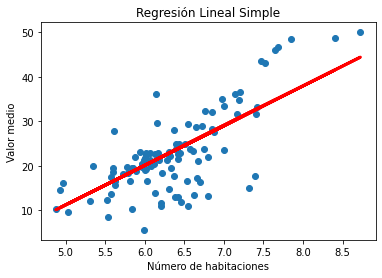

In [ ]:
#Graficamos los datos junto con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

Como podemos observar en la gráfica, la línea roja sería nuestro modelo y los puntos azules son los datos de pruebas con los que lo entrenamos.

Si nos recordamos un poco el objetivo de este algoritmo es que el modelo o la línea abarque el mayor número de muestras y de esta forma disminuir el error que vendría siendo la distancia desde la línea hasta el punto, entonces todos los datos fuera de la línea serían errores, es por esta razón que cuando realizamos la comparación de los datos anteriormente nos encontramos que varios tenían una diferencia considerable, bueno la razón de esto es que el modelo no abarcó todos los puntos.

De igual forma, te acuerdas que cuando graficamos los datos primeramente te comenté que no íbamos a obtener buenos resultados con este algoritmo, y la razón es muy simple los datos se encuentran muy dispersos por lo que es difícil que la línea cubriera la mayoría de los datos por lo que íbamos a obtener una mala precisión, esto no quiere decir que este algoritmo sea malo sino más bien que este algoritmo no es bueno para este conjunto de datos.

Calculemos ahora los valores de la pendiente e intersección para ver como queda la ecuación del modelo.

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE')
print()
print('Valor de la pendiente o coeficiente "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)
print()
print('La ecuación del modelo es igual a:')
print('y = ', lr.coef_, 'x ', lr.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL SIMPLE

Valor de la pendiente o coeficiente "a":
[8.91207808]
Valor de la intersección o coeficiente "b":
-33.351705643718596

La ecuación del modelo es igual a:
y =  [8.91207808] x  -33.351705643718596


Recuerda que la Regresión Lineal Simple viene representada como y es igual a “a” por “x” + “b”, por lo tanto, para el modelo construido “a” es igual a 8,66 y “b” es igual a -31,99 y la ecuación queda como se muestra.

Ahora calculemos la precisión del algoritmo para ello empleamos la instrucción “score” el cual devuelve el resultado de la estadística R al cuadrado.

In [ ]:
print('Precisión del modelo:')
print(lr.score(X_train, y_train))

Precisión del modelo:
0.4682373727864583


El resultado obtenido acá es de 0,458, como ya lo habíamos visto comparando las resultados de “y_predict” y viendo la gráfica podíamos deducir que la precisión no iba a ser muy buena.

Recuerda que esto no significa que el algoritmo sea malo sino que no es el mejor para este conjunto de datos.

Por todo esto es que es bueno saber exactamente de que se trata cada uno de los algoritmos de Machine Learning, para que de una vez que veamos la data podamos deducir qué algoritmo es el más adecuado implementar y de esta forma no perder tiempo en el desarrollo de algoritmos que no vayan a funcionar.

<p><a name="Ejemplo3"></a></p>

# **Ejemplo 3**





<p><a name="regresion"></a></p>

## Regresión lineal / Ejemplo Diplomado

[Contenidos](#contents) 


<p><a name="RegLinSimp"></a></p>


## 2.1 Regresión lineal simple</a><br>



  

Para iniciar nuestro estudio de los algorítmos de regresión usaremosuno de los casos más simples posibles:  la regresión lineal.

Como recordarás la ecuación de una línea recta está dada por la ecuación

$$y = m*x+b$$

Donde $y$ es la variable dependiente, $x$ la independiente y a $m$ y $b$ las llamamos pendientes e intercepto.

En el ambito del ML solemos reescribir la ecuación como

$$y=w_0+w_1x$$

siendo $w_0$ y $w_1$ llamados los "parámetros del modelo"

La **pregunta** que nos haríamos sería: dados un conjunto de datos $(x,y)$, ¿Cuáles son los parámetros para una línea que mejor representan *el conjunto* de datos?

En otras palabras, queremos encontrar los $w_i$ que mínimicen el error al predecir $y$ dado un $x$

![Imagen tomada de medium.com](https://miro.medium.com/max/642/1*xxxqZtZExBJoxmYKIY-waw.png)

Existen varios algoritmos para resolver ésta tarea, el más simple es usar el algorítmo de mínimos cuadrados.

El algoritmo encuentra los parámetros que minimizan la el error cuadrado conjunto (la suma) entre nuestras predicciones y los valores reales.

![Imagen tomada de /www.jmp.com](https://www.jmp.com/en_hk/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model/_jcr_content/par/styledcontainer_2069/par/lightbox_4130/lightboxImage.img.png/1548704005203.png)

Sklearn cuenta con una sublibrería completa para los modelos lineales llamada "linear_model".

Volvamos a nuestro dataset de autos.

In [1]:
import pandas as pd
import numpy as np

In [2]:
archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

In [3]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [5]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

Usaremos el tamaño del motor para crear un modelo sencillo para el precio del auto.

In [6]:
#separemos nuestros datos en features y label
X = df['engine-size'].values.reshape(-1,1) # se utliza reshape para crear el vectort
y = df['price'].values.reshape(-1,1)

In [7]:
X.shape,y.shape

((201, 1), (201, 1))

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 1), (41, 1), (160, 1), (41, 1))

In [10]:
linear  = LinearRegression(normalize=True)

In [11]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [12]:
print('w1 =',linear.coef_)
print('w0 =',linear.intercept_)

w1 = [[174.5482757]]
w0 = [-8836.38107893]


In [13]:
print('R2 =',linear.score(X_test,y_test))

R2 = 0.7735450111026795


In [14]:
y_pred = linear.predict(X_test)

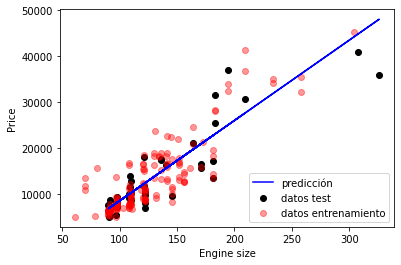

In [15]:
plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='lower right')

plt.xlabel(r'Engine size')
plt.ylabel(r'Price')

plt.show()

<p><a name="RegLinMul"></a></p>

## 3.2. Regresión lineal multiple


Normalmente los problemas de ML no son tan simples y los datos están compuestos de muchos predictores. En éstos casos podemos usar también el algorítmo de regresión lineal, haciendo una extensión de la ecuación de la linea a más dimensiones:
$$y=w_0+w_1x_1+w_2x_2+...+w_nx_n$$

Donde $n$ será la cantidad de variables predictoras en nuestros datos y de nuevo $w_i$ será el **peso** del predictor $x_i$.

En éstos casos ya no tendremos una línea si no un plano, o hiperplano como modelo.

Veamos un modelo 2D.

Usemos ahora el tamaño del motor y el peso vacío como predictores del precio.

In [16]:
X = df[['engine-size','curb-weight']]
y = df['price']

In [17]:
X.shape,y.shape

((201, 2), (201,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)
X_train.shape,X_test.shape

((160, 2), (41, 2))

In [19]:
linearM  = LinearRegression(normalize=True)
linearM.fit(X_train,y_train)
print('R2 =',linearM.score(X_test,y_test))

R2 = 0.8138779449118414


In [20]:
print('w1, w2 =',linearM.coef_)
print('w0 =',linearM.intercept_)

w1, w2 = [117.18848596   4.97221762]
w0 = -14334.771686602337


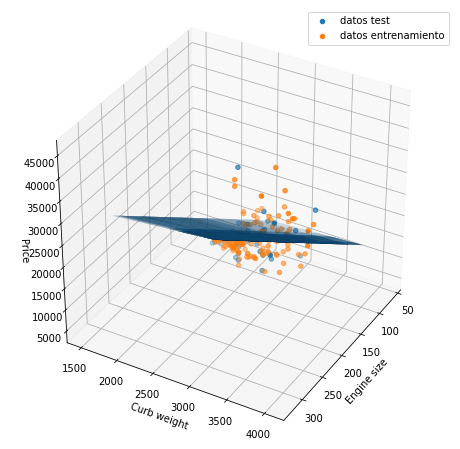

In [21]:
from mpl_toolkits.mplot3d import Axes3D

xx,yy = np.meshgrid(X_test['engine-size'].values, X_test['curb-weight'].values)
zz = linearM.intercept_+linearM.coef_[0]*xx+linearM.coef_[1]*yy

sc = plt.figure(figsize=(8,8)).gca(projection='3d')
sc.scatter(X_test['engine-size'], X_test['curb-weight'], y_test,label=r'datos test')
sc.scatter(X_train['engine-size'], X_train['curb-weight'], y_train,label=r'datos entrenamiento')
sc.plot_surface(xx, yy, zz, alpha=0.05)
sc.legend()

sc.view_init(elev=35, azim=30)
sc.set_xlabel('Engine size')
sc.set_ylabel('Curb weight')
sc.set_zlabel('Price')
plt.show()

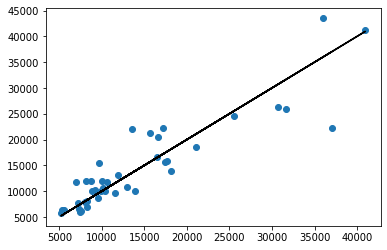

In [22]:
plt.scatter(y_test,linearM.predict(X_test))
plt.plot(y_test,y_test,c='k')

LinearRegression usa el método de mínimos cuadrados, ésto hace que los parámetros estimados dependan fuertemente de la independencia de las características.

Cuando las columnas están fuertemente correlacionadas, llamado multicolinealidad, el algorítmo de mínimos cuadrados es altamente sensible a variaciones aleatorias en la variable diana, haciendo que la varianza sea bastante grande.




p><a name="OtrEstLim"></a></p>

## 3.3 Otros estimadores lineales





Dado el problema de multicolinealidad del algorírmo de mínimos cuadrados podemos mencionar dos opciones que vienen implementadas también en sklearn:

*   Regresión Ridge
*   Regresión Lasso


## 3.3.1 Regresión Ridge

<p><a name="RegRid"></a></p>

  
  


En éste típo de algorítmo se impondrá una penalidad sobre los coeficientes calculados, de tal manera que se modificará el error de los mínimos cuadrados como:

$$\sum (Y_i-\hat Y_i)^2+\alpha \sum w_i^2 $$


El hiperparámetro $\alpha$, llamado complejidad, controla qué tanto se penaliza los coeficientes, haciendo que éstos sean más pequeños y por tanto estabilizando las soluciones aunque a costa de una menor sesibilidad a los datos.


Para comparar entrenemos un modelo LinearRegresor y uno Ridge con todos los datos

In [23]:
df.dropna(inplace=True)
X = df[['symboling', 'normalized-losses', 'wheel-base', 'length',
       'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'city-L/100km',  'diesel', 'gas']]
y = df['price']

In [24]:
X.shape,y.shape

((196, 18), (196,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)
X_train.shape,X_test.shape

((156, 18), (40, 18))

In [26]:
from sklearn.linear_model import Ridge

In [27]:
#modelo OLS
linearM  = LinearRegression(normalize=True)
linearM.fit(X_train,y_train)
print('R2 Train =',linearM.score(X_train,y_train))
print('R2 Test =',linearM.score(X_test,y_test))
print('wi OLS =',linearM.coef_)
print('w0 OLS =',linearM.intercept_)

R2 Train = 0.876044378665338
R2 Test = 0.8435359669008109
wi OLS = [ 3.21614312e+01 -1.03220246e+01  1.41118840e+02 -2.23572818e+04
  4.32821190e+04  1.74105227e+02 -1.52039826e-01  1.11924260e+02
 -9.95886066e+01 -2.85373944e+03  6.92164686e+02  2.32587030e+01
  1.80134818e+00  2.27747260e+01  2.17008482e+02  1.52150525e+03
 -1.84019329e+03  1.84019329e+03]
w0 OLS = -76507.00943884654


In [28]:
#Modelo Ridge
ridge  = Ridge(alpha=1,normalize=True)
ridge.fit(X_train,y_train)
print('R2 Train =',ridge.score(X_train,y_train))
print('R2 Test =',ridge.score(X_test,y_test))
print('wi Ridge =',ridge.coef_)
print('w0 Ridge =',ridge.intercept_)

R2 Train = 0.784808922692682
R2 Test = 0.7133951662369991
wi Ridge = [ 7.37216191e+01 -3.83731882e-01  6.53044658e+01  5.87166942e+03
  2.54199023e+04  2.68756816e+01  1.45468267e+00  3.67838020e+01
  1.19095810e+03 -4.71217393e+02  8.08538699e+01  2.89763652e+01
  3.06326189e-01 -5.65004684e+01 -5.56486013e+01  3.61066213e+02
  8.67411260e+02 -8.67411260e+02]
w0 Ridge = -38835.23676298204


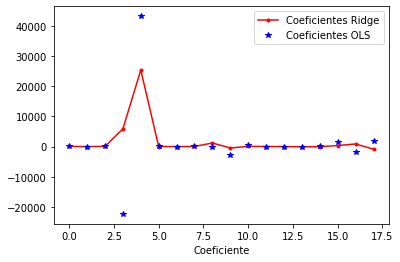

In [29]:
plt.figure()
plt.plot(ridge.coef_,'r.-',label=r'Coeficientes Ridge')
plt.plot(linearM.coef_,'b*',label=r'Coeficientes OLS')
plt.legend()
plt.xlabel(r'Coeficiente')
plt.show()

Vemos que en el caso del dataset para autos con un valor de $\alpha = 1$ se nota una pequeña variación en los parámetros y la precisión del modelo.

El modelo se hace robusto a variaciones de los predictores, pero pierde un poco de precisión (se necesitan más datos para entrenamiento)

En general el hiperparámetro $\alpha$ debe ser  buscado con varios experimentos.

## 3.3.2 Regresión Lasso

<p><a name="RegLas"></a></p>

Al igual que el algorítmo Ridge, Lasso impone una penalidad sobre la función de error del OLS, pero ésta en cambio está dada por el valor absoluto de los coeficientes, así:
$$\sum (Y_i-\hat Y_i)^2+\alpha \sum |w_i|$$

Esto hace que a diferencia de Ridge que buscaba hacer pequeños los valores de algunos $w_i$, Lasso fuerza a que sean 0.

Así, puede decirse que Ridge es bueno cuando esperamos que todos los predictores tengan una influencia sobre el predictor así sea pequeña, mientras que Lasso se usará cuando esperamos que el numero de predictores relevantes sea pequeño (predictores con peso diferente de 0).

Para implementar una regresión tipo Lasso se sigue el mismo esquema de los casos anteriores.

In [30]:
from sklearn.linear_model import Lasso

#modelo Lasso
lasso  = Lasso(alpha=10,normalize=True)
lasso.fit(X_train,y_train)
print('R2 Lasso =',lasso.score(X_test,y_test))
print('wi Lasso =',lasso.coef_)
print('w0 Lasso =',lasso.intercept_)

R2 Lasso = 0.8360932068188104
wi Lasso = [-0.00000000e+00 -3.19883868e+00  0.00000000e+00 -0.00000000e+00
  3.43182211e+04  1.19391461e+02  0.00000000e+00  1.20148466e+02
 -0.00000000e+00 -2.49132114e+03  3.08466036e+02  2.00496318e+01
  1.51785391e+00  0.00000000e+00  0.00000000e+00  5.19565705e+02
  0.00000000e+00 -0.00000000e+00]
w0 Lasso = -49559.07715934429


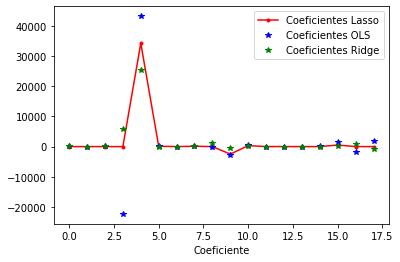

In [31]:
plt.figure()
plt.plot(lasso.coef_,'r.-',label=r'Coeficientes Lasso')
plt.plot(linearM.coef_,'b*',label=r'Coeficientes OLS')
plt.plot(ridge.coef_,'g*',label=r'Coeficientes Ridge')
plt.legend()
plt.xlabel(r'Coeficiente')
plt.show()

In [32]:
print('numero de coeficientes:',len(linearM.coef_))
print('numero de coeficientes diferentes a cero para Ridge:',len(ridge.coef_[ridge.coef_!=0]))
print('numero de coeficientes diferentes a cero para Lasso:',len(lasso.coef_[lasso.coef_!=0]))

numero de coeficientes: 18
numero de coeficientes diferentes a cero para Ridge: 18
numero de coeficientes diferentes a cero para Lasso: 9


In [33]:
caracteristicas=['symboling', 'normalized-losses', 'wheel-base', 'length',
       'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'city-L/100km',  'diesel', 'gas']

In [34]:
for i,val in enumerate(lasso.coef_):
  if val!=0: print(caracteristicas[i])

normalized-losses
width
height
engine-size
stroke
compression-ratio
horsepower
peak-rpm
city-L/100km


Como vemos, Lasso ha disminuído el número de coeficientes mientras que Ridge no lo hace.

La elección entre éstos 3 tipos de regresión lineal depende fuertemente de nuestro dataset (sus correlaciones), nuestro conocimiento del campo (relaciones esperadas de las variables predictoras y la variable diana) y nuestras necesidades computacionales.



# **Ejemplo 4**

<p><a name="Ejemplo4"></a></p>

Analizar la tres regresiones lineales vistas en clase y ver la afectación de los resultados al implementar la normalización y la regularización con el parámetro $\alpha$



## **Pregunta 1**

<p><a name="Pregunta1"></a></p>



Cargar el dataset de autos, eliminar las filas con valores nulos y dejar solo las columnas con variables numéricas

In [35]:
import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

df.dropna(inplace=True)
dfNum=df.select_dtypes(include=['float64','int64'])

In [36]:
dfNum

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,0,1
197,-1,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,0,1
198,-1,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,0,1
199,-1,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,1,0


## **Pregunta 2**

<p><a name="Pregunta2"></a></p>



Definir la variable a predecir $y$ como el precio y la matriz de características $X$ con el resto de variables numéricas

In [37]:
y=dfNum['price']
X=dfNum.loc[:, dfNum.columns != 'price']
#alternativa dfNum.drop('price',axis=1)


## **Pregunta 3**

<p><a name="Pregunta3"></a></p>



Separar el dataset de cancer (incluído en los dataset de juguete de sklearn) en los subsets de entrenamiento (train) y prueba (test).

**ayuda:** importe from sklearn.datasets import load_breast_cancer
y use 'load_breast_cancer?' para ver la ayuda de éste dataset 

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)




## **Pregunta 4**

<p><a name="Pregunta4"></a></p>



Para el dataset de autos, hacer una regresión por mínimos cuadrados y calcular el intercepto, los coeficientes y los score de entrenamiento y prueba 

In [44]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

print('Autos dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Autos dataset
linear model intercept: 3.2643236829497217
linear model coeff:
[ 1.95664033e-01 -1.24998359e-02 -1.83925145e-02 -3.08554299e-04
 -6.58769659e-01  4.67316114e+00 -1.41047944e+00 -1.79519061e+00
 -1.02466251e+00 -8.16682870e-01 -6.95506836e-01 -2.65194673e-02
  6.52894932e-02  3.22253562e-04 -1.16323309e+01 -4.43943865e-02
  3.04134165e+00 -8.31729413e+00 -2.44644000e+00  1.96844051e+01
 -1.78964757e-01 -2.00410588e-04 -4.02896117e-03  1.17548563e-03
 -4.04988322e-01 -1.15267671e-01 -4.11583121e-01 -9.11239745e-01
 -1.12925131e-01 -5.02459596e+00]
R-squared score (training): 0.782
R-squared score (test): 0.729


## **Pregunta 5**

<p><a name="Pregunta5"></a></p>



Hacer una regresión de Ridge y calcular el intercepto, los coeficientes, los score de entrenamiento y prueba. 

In [39]:
from sklearn.linear_model import Ridge


linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Autos dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Autos dataset
ridge regression linear model intercept: -55184.68541078386
ridge regression linear model coeff:
[ 1.31970783e+02 -1.04593366e+01  1.52151544e+02 -4.26529690e+01
  4.38328221e+01  1.68811913e+02 -3.27687882e-01  1.15266483e+02
  2.11137200e+01 -1.20662595e+03  3.89066244e+02  3.24198756e+01
  2.05070282e+00  4.07849121e+01  1.66922699e+02  1.15358749e+03
 -3.57193382e+01  3.57193382e+01]
R-squared score (training): 0.865
R-squared score (test): 0.835
Number of non-zero features: 18




## **Pregunta 6**

<p><a name="Pregunta6"></a></p>




Hacer normalización de los datos e la misma regresión de Ridge anterior y obtener las mismas métricas.

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Autos dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))


Autos dataset
ridge regression linear model intercept: 5795.548624618802
ridge regression linear model coeff:
[   33.71976218   284.85076735  1909.86219022  2104.34913151
  2725.03202383   467.47053141  3174.86137518  3511.85375642
  1811.82346191    75.92412409   726.21439533  4118.38926191
   -54.48866121 -2102.879329   -2137.63977338  3378.40854862
   881.71257277  -881.71257277]
R-squared score (training): 0.690
R-squared score (test): 0.598
Number of non-zero features: 18


## **Pregunta 7**

<p><a name="Pregunta7"></a></p>



Implementar la regresión de Ridge con las variables escaldas para los siguientes valores del parámetro de regularización $\alpha=[0, 1, 10, 20, 50, 100, 1000]$

In [41]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 18, r-squared training: 0.88, r-squared test: 0.84

Alpha = 1.00
num abs(coeff) > 1.0: 18, r-squared training: 0.85, r-squared test: 0.80

Alpha = 10.00
num abs(coeff) > 1.0: 18, r-squared training: 0.75, r-squared test: 0.67

Alpha = 20.00
num abs(coeff) > 1.0: 18, r-squared training: 0.69, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 18, r-squared training: 0.54, r-squared test: 0.45

Alpha = 100.00
num abs(coeff) > 1.0: 18, r-squared training: 0.39, r-squared test: 0.31

Alpha = 1000.00
num abs(coeff) > 1.0: 18, r-squared training: 0.06, r-squared test: 0.04



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.78414e-17): result may not be accurate.
  overwrite_a=True).T


## **Pregunta 8**

<p><a name="Pregunta8"></a></p>



Realizar los mismos calculos de las preguntas 5-7 pero esta vez para la regresión de Lasso

In [42]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Autos dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))


print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Autos dataset
lasso regression linear model intercept: -7318.73269068387
lasso regression linear model coeff:
[   55.7173283  -1848.86646357  3758.57361237 -6014.80773048
  6913.9172171   1931.51366504    -0.         28714.14864395
  -229.42655735 -6355.3245175   6498.12415058  3525.42624408
  4769.031939       0.          8255.80400107 16071.17280707
   -39.12924772     0.        ]
Non-zero features: 15
R-squared score (training): 0.876
R-squared score (test): 0.847

Features with non-zero weight (sorted by absolute magnitude):
	engine-size, 28714.149
	city-L/100km, 16071.173
	highway-mpg, 8255.804
	width, 6913.917
	compression-ratio, 6498.124
	stroke, -6355.325
	length, -6014.808
	peak-rpm, 4769.032
	wheel-base, 3758.574
	horsepower, 3525.426
	height, 1931.514
	normalized-losses, -1848.866
	bore, -229.427
	symboling, 55.717
	diesel, -39.129
Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 18, r-squared t